## ThinkDSP

This notebook contains code examples from Chapter 2: Harmonics

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

## Waveforms and harmonics

Create a triangle signal and plot a 3 period segment.

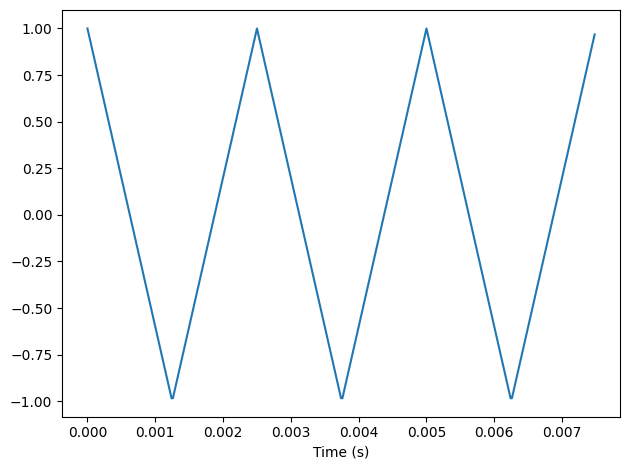

In [6]:
from thinkdsp import TriangleSignal
from thinkdsp import decorate

signal = TriangleSignal(400)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=50000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [3]:
wave = signal.make_wave(duration=2, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

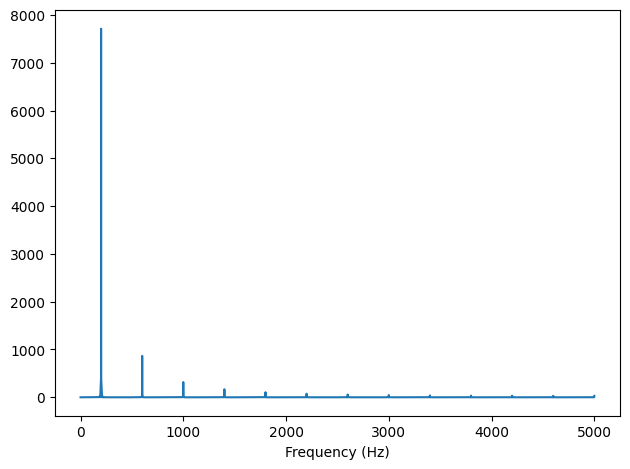

In [5]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Make a square signal and plot a 3 period segment.

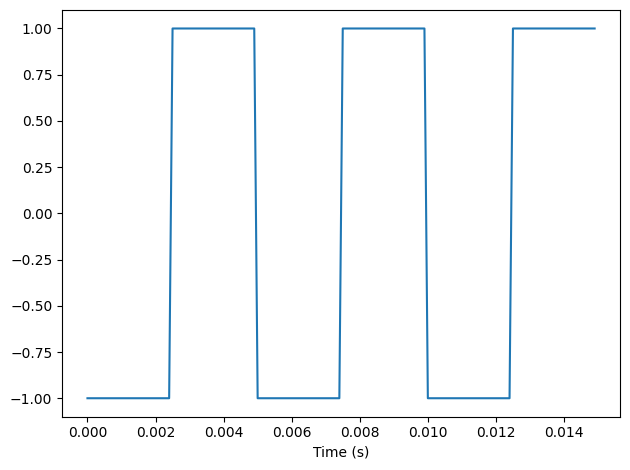

In [13]:
from thinkdsp import SquareSignal

signal = SquareSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [14]:
wave = signal.make_wave(duration=4, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

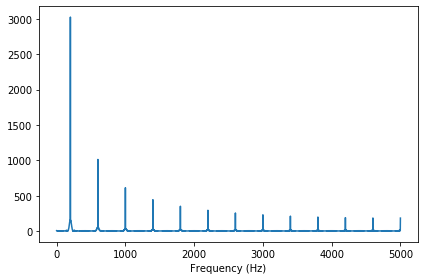

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Create a sawtooth signal and plot a 3 period segment.

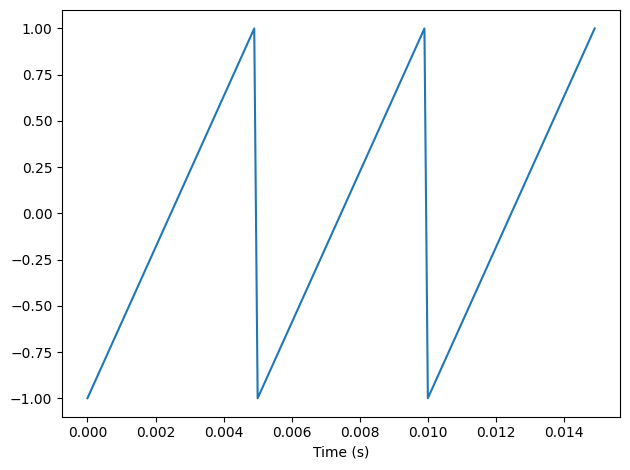

In [15]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [17]:
wave = signal.make_wave(duration=4, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

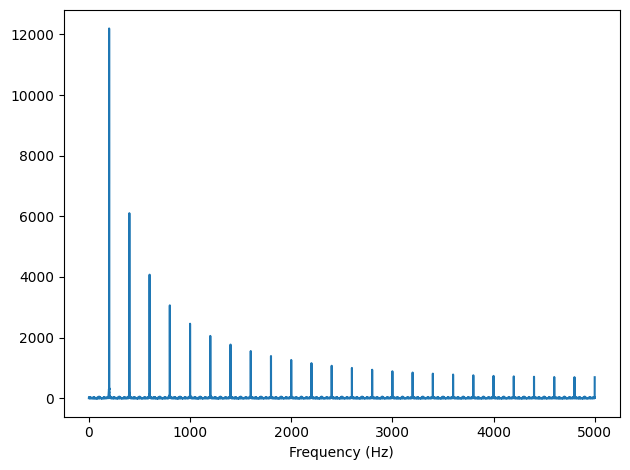

In [18]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

### Aliasing

Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

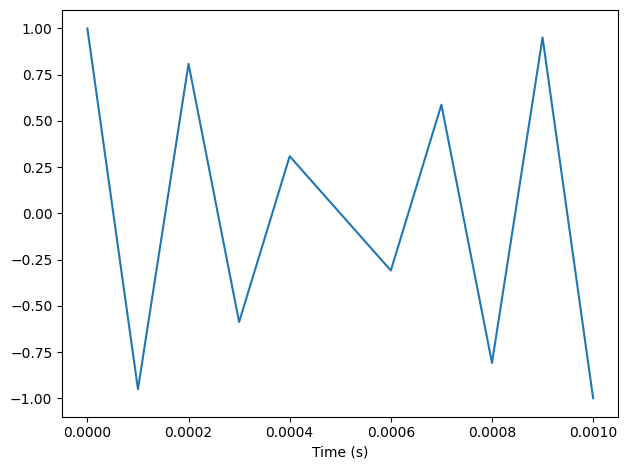

In [7]:
from thinkdsp import CosSignal

signal = CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a cosine signal at 5500 Hz, make a wave at framerate 10 kHz, and plot the same duration.

With framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.

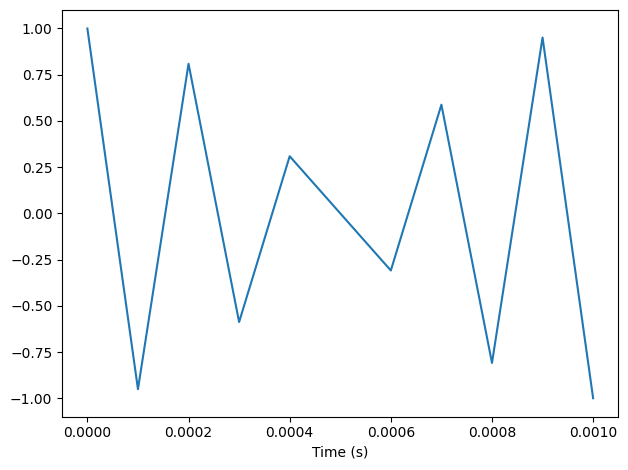

In [8]:
signal = CosSignal(5500)
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a triangle signal and plot the spectrum.  See how the harmonics get folded.

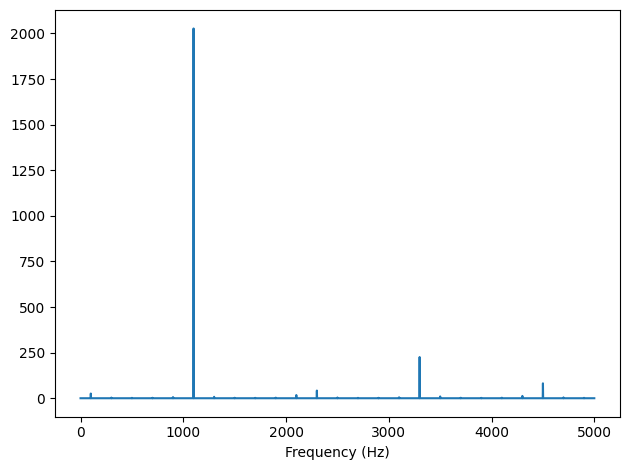

In [9]:
signal = TriangleSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

## Amplitude and phase

Make a sawtooth wave.

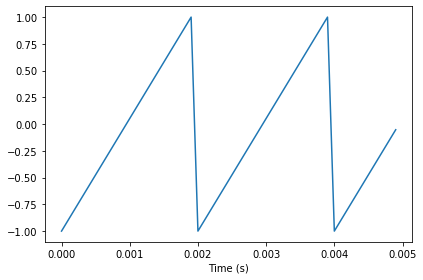

In [ ]:
signal = SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

Play it.

In [ ]:
wave.make_audio()

Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [19]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs

array([   1.81702107 +0.j        ,  -24.93937344-14.12383343j,
          6.27368273-27.77837256j, ...,   23.95454335+27.77304375j,
         -7.14941028+14.12115255j, -693.41452635 +0.j        ])

Compute the frequencies that match up with the elements of the FFT.

In [ ]:
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

Plot the magnitudes vs the frequencies.

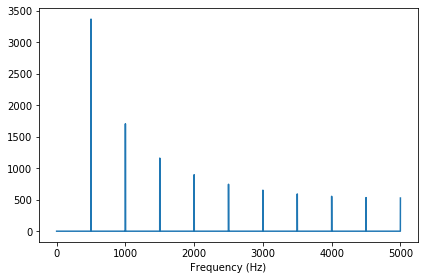

In [ ]:
import matplotlib.pyplot as plt

magnitude = np.absolute(hs)
plt.plot(fs, magnitude)
decorate(xlabel='Frequency (Hz)')

Plot the phases vs the frequencies.

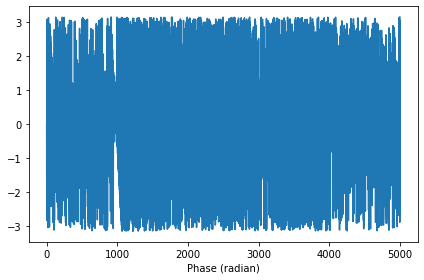

In [ ]:
angle = np.angle(hs)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

## What does phase sound like?

Shuffle the phases.

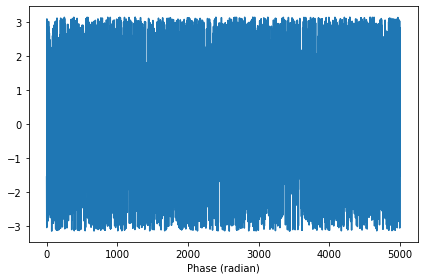

In [ ]:
import random
random.shuffle(angle)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

Put the shuffled phases back into the spectrum.  Each element in `hs` is a complex number with magitude $A$ and phase $\phi$, with which we can compute $A e^{i \phi}$

In [ ]:
i = complex(0, 1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

Convert the spectrum back to a wave (which uses irfft).

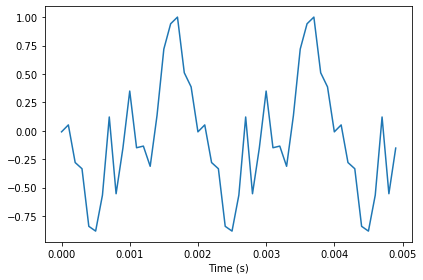

In [ ]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

Play the wave with the shuffled phases.

In [ ]:
wave2.make_audio()

For comparison, here's the original wave again.

In [ ]:
wave.make_audio()

Although the two signals have different waveforms, they have the same frequency components with the same amplitudes.  They differ only in phase.

## Aliasing interaction

The following interaction explores the effect of aliasing on the harmonics of a sawtooth signal.

In [ ]:
def view_harmonics(freq, framerate):
    """Plot the spectrum of a sawtooth signal.
    
    freq: frequency in Hz
    framerate: in frames/second
    """
    signal = SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='C0')
    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')
    display(wave.make_audio())

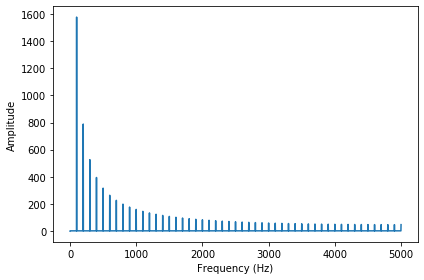

In [ ]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2)